## 任务1： 数据预处理

本项目包含一份血糖监测设备记录用户测量值数据集，由16个糖前（或者接近糖前）用户组成，血糖监测设备记录用户的葡萄糖浓度（mg/dl）,穿戴设备记录了血容量脉冲（BVP）信号、皮肤电活动（EDA）、皮肤温度（TEMP）、心率（HR）、搏动间隔（IBI）和三轴加速度计（ACC）。

所有数据均保存在big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0.zip文件中，请自行解压到data文件夹中。数据压缩包具体内容如下：

![](https://ai-studio-static-online.cdn.bcebos.com/1bcc44c61b3a490f8ced5e5c6561acd0a17a4eaa5bfb452f86df866311e582fa)

每位用户的特征数据均保存在对应序号的文件夹中，如上图所示，以用户001为例来说明每位用户的具体特征信息，见下图。每位用户的文件夹内均有8个csv文件，每个文件中存放着对应特征的记录时间与数值。其中Dexcom文件中保存的是通过血糖监测设备记录的用户真实血糖值，其余的七个csv文件中保存的均为通过穿戴设备记录的特征值，其中Food表示用户饮食的数据，含文本特征，可单独考虑。

![](https://ai-studio-static-online.cdn.bcebos.com/58eef270ad3b47cf8f0a4eb8d127262c5d0dcbfa7feb4b91aa59430e51981e7f)

在进行数据预处理等操作时通过pandas读取相应的csv文件即可。

具体任务分为以下5点：

### 任务点1.1 数据采样与整合

每个表格的采样时间不完全相同，请通过采样和时间匹配完成不同数据表的整合任务。整合每位测量者的多个数据表（TEMP、IBI、HR、EDA、BVP、ACC、Dexcom），最终形成一个完整的属性数据表，每个特征的顺序可自行决定。

In [3]:
# 根据Dexcom五分钟间隔采样，
import pandas as pd

# 定义文件编号列表
file_nums = [f'{i:03d}' for i in range(2, 17)]  # 生成从 '002' 到 '016' 的文件编号

for file_num in file_nums:
    # 读取各个CSV文件
    Dexcom = pd.read_csv(f'data/{file_num}/Dexcom_{file_num}.csv', skiprows=13, header=None)
    Dexcom = Dexcom[[1, 7]]
    Dexcom.columns = ['datetime', 'Glucose Value (mg/dL)']
    Dexcom['datetime'] = pd.to_datetime(Dexcom['datetime'])

    ACC = pd.read_csv(f'data/{file_num}/ACC_{file_num}.csv')
    ACC['datetime'] = pd.to_datetime(ACC['datetime'])

    BVP = pd.read_csv(f'data/{file_num}/BVP_{file_num}.csv')
    BVP['datetime'] = pd.to_datetime(BVP['datetime'])

    EDA = pd.read_csv(f'data/{file_num}/EDA_{file_num}.csv')
    EDA['datetime'] = pd.to_datetime(EDA['datetime'])

    IBI = pd.read_csv(f'data/{file_num}/IBI_{file_num}.csv')
    IBI['datetime'] = pd.to_datetime(IBI['datetime'])

    TEMP = pd.read_csv(f'data/{file_num}/TEMP_{file_num}.csv')
    TEMP['datetime'] = pd.to_datetime(TEMP['datetime'])
    
    HR = pd.read_csv(f'data/{file_num}/HR_{file_num}.csv')
    HR['datetime'] = pd.to_datetime(HR['datetime'])
    
    IBI = IBI.sort_values(by='datetime')
    # 合并数据框
    merged_data = Dexcom.merge(ACC, on='datetime', how='inner')
    merged_data = merged_data.merge(BVP, on='datetime', how='inner')
    merged_data = merged_data.merge(EDA, on='datetime', how='inner')
    merged_data = merged_data.merge(TEMP, on='datetime', how='inner')
    merged_data = merged_data.merge(HR, on='datetime', how='inner')
    merged_data = pd.merge_asof(
        left=merged_data,
        right=IBI,
        on='datetime',
        by=None,
        tolerance=pd.Timedelta('60s'),
        direction='nearest'
    )

    # 处理缺失值
    for column in merged_data.columns:
        if merged_data[column].isna().any():
            mean_value = merged_data[column].mean()
            merged_data[column] = merged_data[column].fillna(mean_value)

    # 保存每个文件处理后的数据到单独的CSV文件
    output_file_path = f'processed_data/processed_data_{file_num}.csv'
    merged_data.to_csv(output_file_path, index=False)
    print(f'Processed and saved data for file number {file_num}')



Processed and saved data for file number 002
Processed and saved data for file number 003
Processed and saved data for file number 004
Processed and saved data for file number 005
Processed and saved data for file number 006
Processed and saved data for file number 007
Processed and saved data for file number 008
Processed and saved data for file number 009
Processed and saved data for file number 010
Processed and saved data for file number 011
Processed and saved data for file number 012
Processed and saved data for file number 013
Processed and saved data for file number 014
Processed and saved data for file number 015
Processed and saved data for file number 016


### 任务点1.2 缺失值处理与异常值检测

请对合并后的特征总表进行缺失值与异常值的检测与处理，完成对表中数据的进一步排查与处理。

In [4]:
# 请在下方完成任务
# 缺失值补为平均值

# 定义文件编号列表
file_nums = [f'{i:03d}' for i in range(2, 17)]  # 生成从 '001' 到 '016' 的文件编号

for file_num in file_nums:
    # 处理缺失值
    merged_data=pd.read_csv(f'processed_data/processed_data_{file_num}.csv')
    for column in merged_data.columns:
        if merged_data[column].isna().any():
            mean_value = merged_data[column].mean()
            merged_data[column] = merged_data[column].fillna(mean_value)

    # 保存每个文件处理后的数据到单独的CSV文件
    output_file_path = f'processed_data/processed_data_{file_num}.csv'
    merged_data.to_csv(output_file_path, index=False)
    print(f'Processed and saved data for file number {file_num}')


Processed and saved data for file number 002
Processed and saved data for file number 003
Processed and saved data for file number 004
Processed and saved data for file number 005
Processed and saved data for file number 006
Processed and saved data for file number 007
Processed and saved data for file number 008
Processed and saved data for file number 009
Processed and saved data for file number 010
Processed and saved data for file number 011
Processed and saved data for file number 012
Processed and saved data for file number 013
Processed and saved data for file number 014
Processed and saved data for file number 015
Processed and saved data for file number 016


In [5]:
# 增加将三轴加速度矢量合成为acc
import pandas as pd
file_nums = [f'{i:03d}' for i in range(2, 17)]
for file_num in file_nums:
    # 读取文件
    merged_data = pd.read_csv(f'processed_data/processed_data_{file_num}.csv')
    
    # 检查列名是否符合预期
    acc_cols = ['acc_x', 'acc_y', 'acc_z']
    
    # 确保这些列存在
    if all(col in merged_data.columns for col in acc_cols):
        # 合成三轴加速度矢量
        merged_data['acc'] = np.sqrt(
            merged_data[acc_cols[0]]**2 +
            merged_data[acc_cols[1]]**2 +
            merged_data[acc_cols[2]]**2
        )
    
    # 保存每个文件处理后的数据到单独的CSV文件
    output_file_path = f'processed_data/processed_data_{file_num}.csv'
    merged_data.to_csv(output_file_path, index=False)
    print(f'Processed and saved data for file number {file_num}')

Processed and saved data for file number 002
Processed and saved data for file number 003
Processed and saved data for file number 004
Processed and saved data for file number 005
Processed and saved data for file number 006
Processed and saved data for file number 007
Processed and saved data for file number 008
Processed and saved data for file number 009
Processed and saved data for file number 010
Processed and saved data for file number 011
Processed and saved data for file number 012
Processed and saved data for file number 013
Processed and saved data for file number 014
Processed and saved data for file number 015
Processed and saved data for file number 016


### 任务点1.3 数据归一化

由于数据的不同特征属性值的差异较大，并不利于模型的选择和使用，所以要对数据完成归一化操作。

In [7]:
# 请在下方完成任务，并保存处理的样本矩阵到本地
file_nums = [f'{i:03d}' for i in range(2, 17)]  # 生成从 '002' 到 '016' 的文件编号

for file_num in file_nums:
    # 读取 CSV 文件
    merged_data = pd.read_csv(f'processed_data/processed_data_{file_num}.csv')
    
    # 对每一列进行归一化处理
    for column in merged_data.columns[2:]:  # 从第三列开始
        if merged_data[column].dtype in ['float64', 'int64']:  # 只对数值类型的数据列进行归一化
            column_max = merged_data[column].max()
            column_min = merged_data[column].min()
            if column_max != column_min:  # 避免除以0的情况
                merged_data[column] = (merged_data[column] - column_min) / (column_max - column_min)
    
    # 保存每个文件处理后的数据到单独的CSV文件
    output_file_path = f'processed_data/processed_data_{file_num}.csv'
    merged_data.to_csv(output_file_path, index=False)
    print(f'Normalized and saved data for file number {file_num}')

Normalized and saved data for file number 002
Normalized and saved data for file number 003
Normalized and saved data for file number 004
Normalized and saved data for file number 005
Normalized and saved data for file number 006
Normalized and saved data for file number 007
Normalized and saved data for file number 008
Normalized and saved data for file number 009
Normalized and saved data for file number 010
Normalized and saved data for file number 011
Normalized and saved data for file number 012
Normalized and saved data for file number 013
Normalized and saved data for file number 014
Normalized and saved data for file number 015
Normalized and saved data for file number 016


### 任务点1.4 血糖值可视化与时间属性离散化（阶段化）

不同用户每天的血糖值不断变化。通过可视化来观测不同用户一天血糖值的变化规律、高糖出现的时间、频率等。

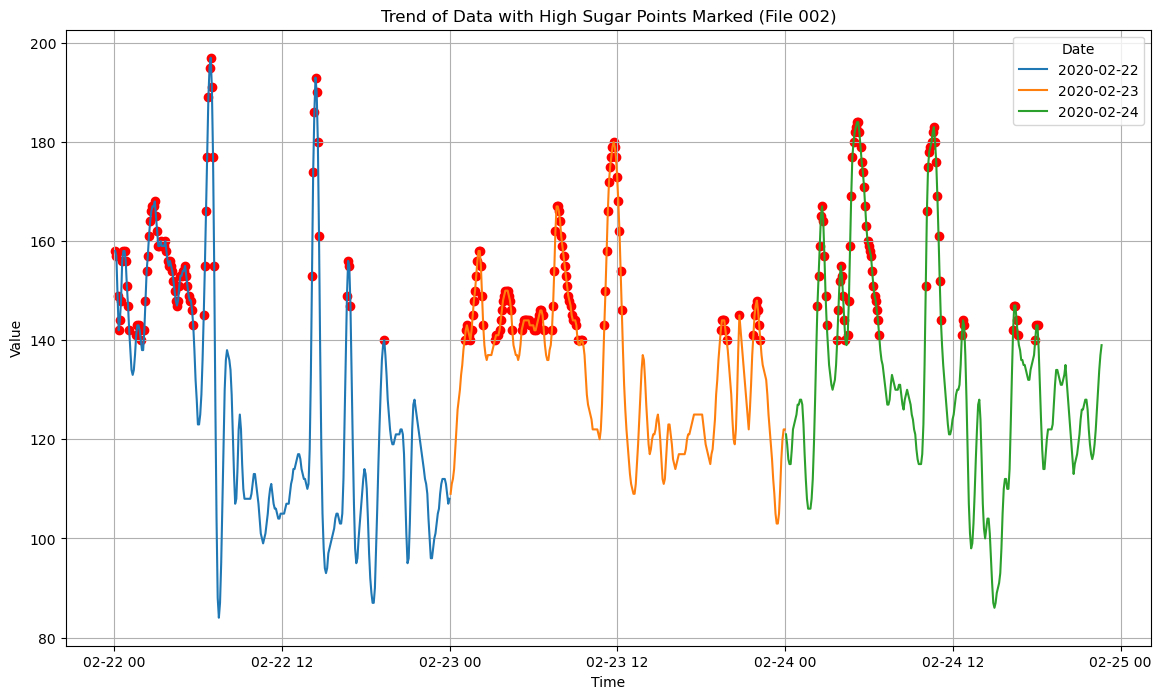

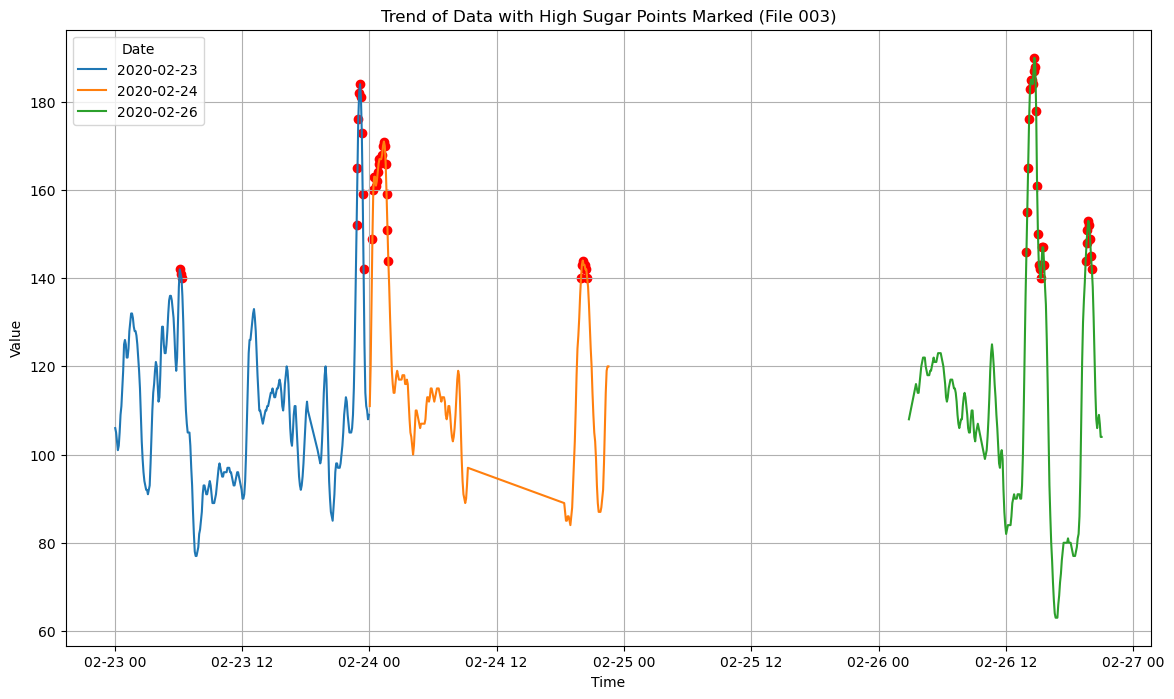

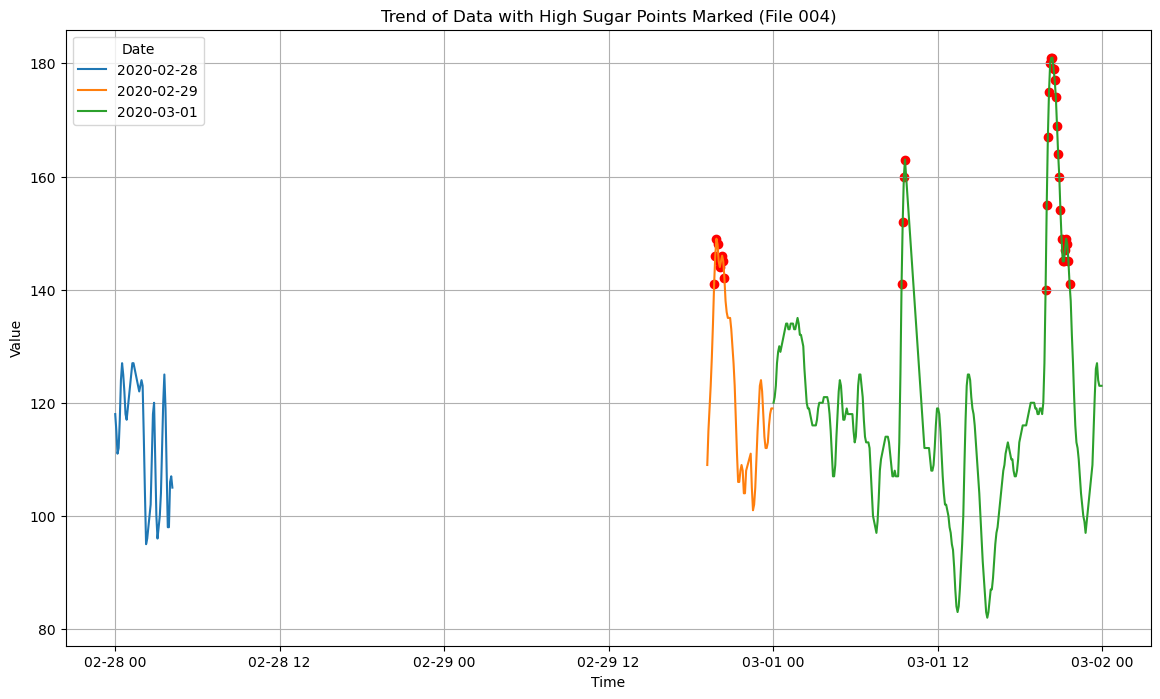

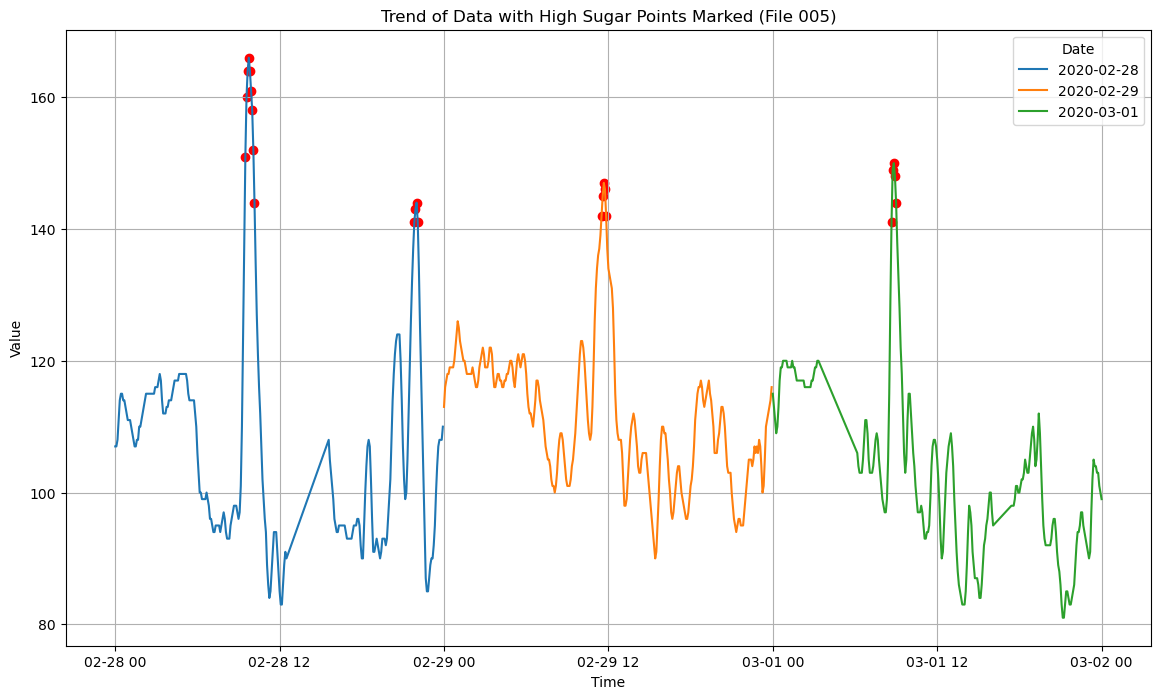

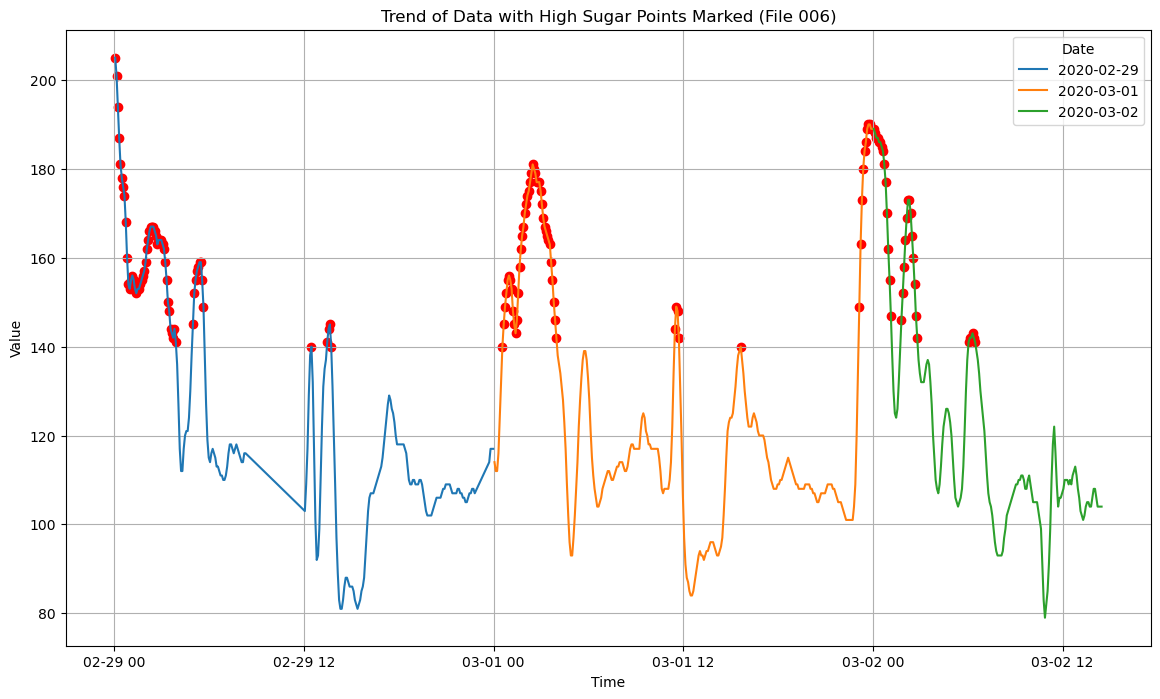

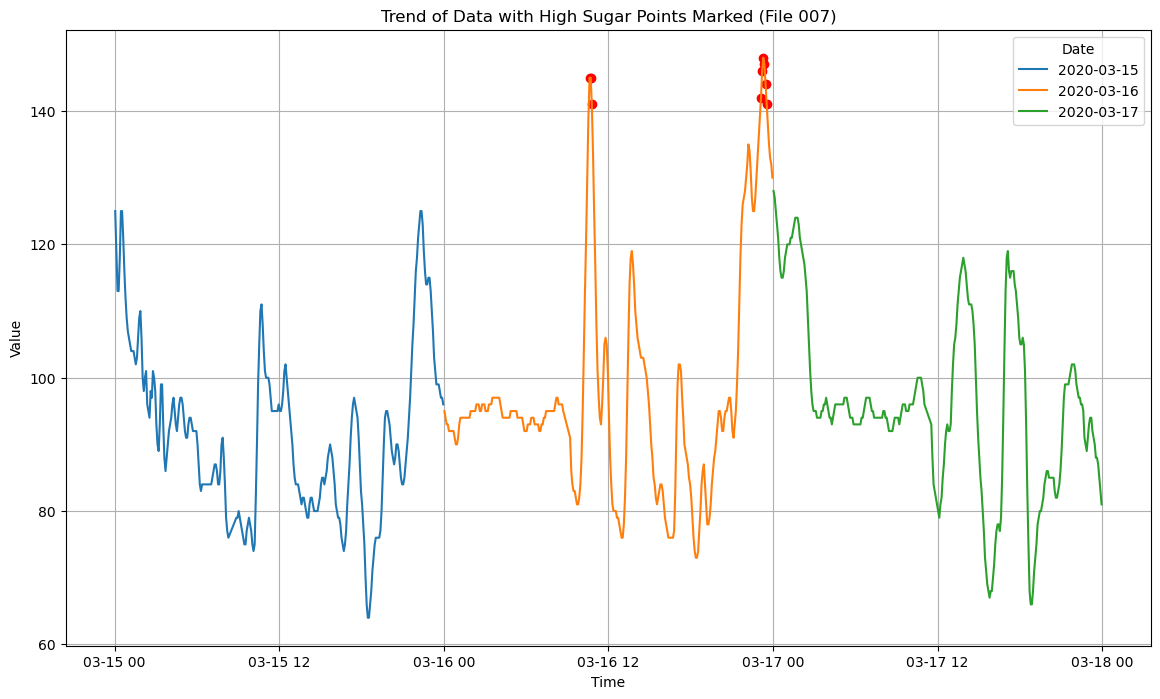

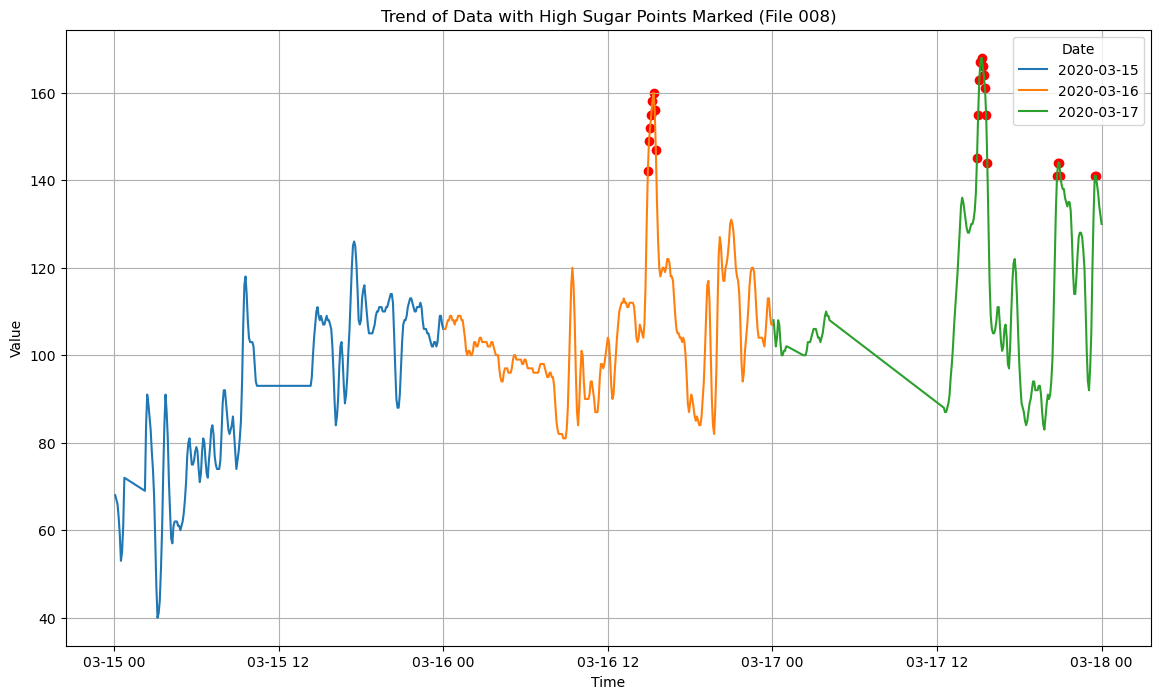

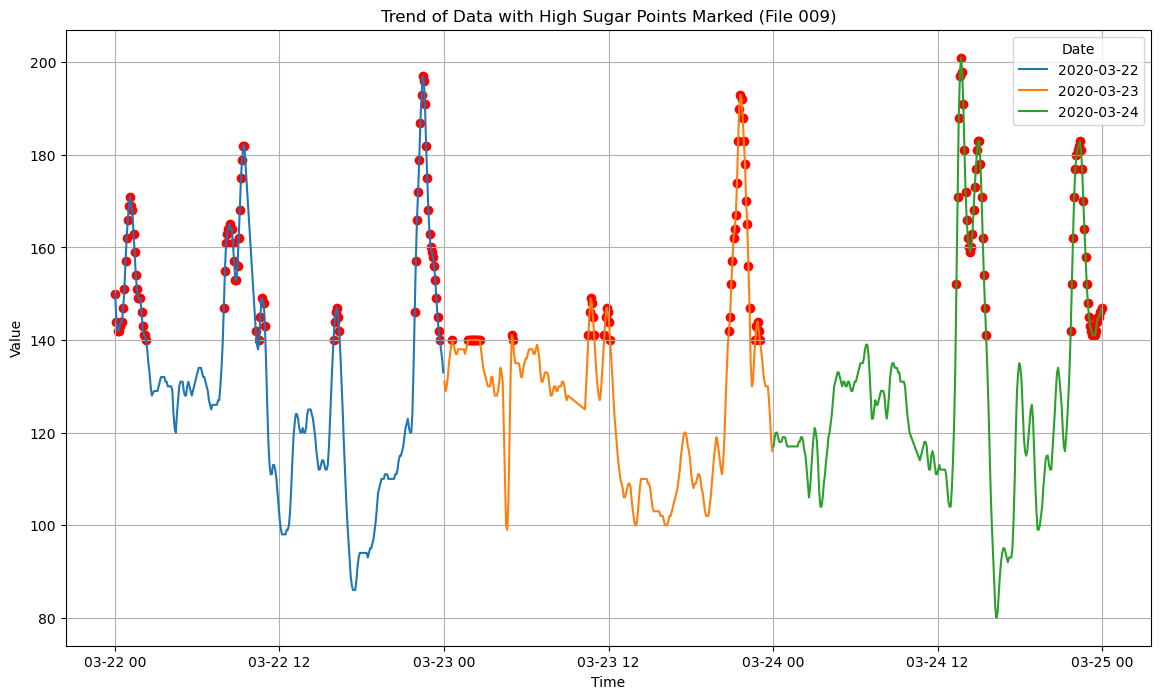

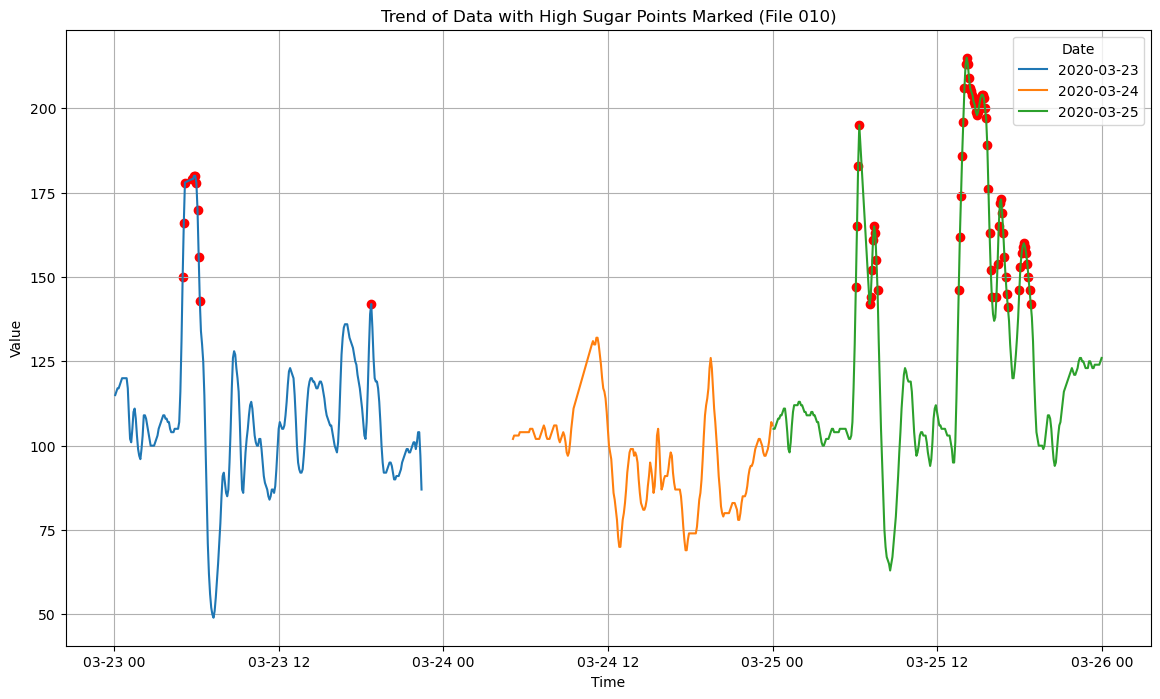

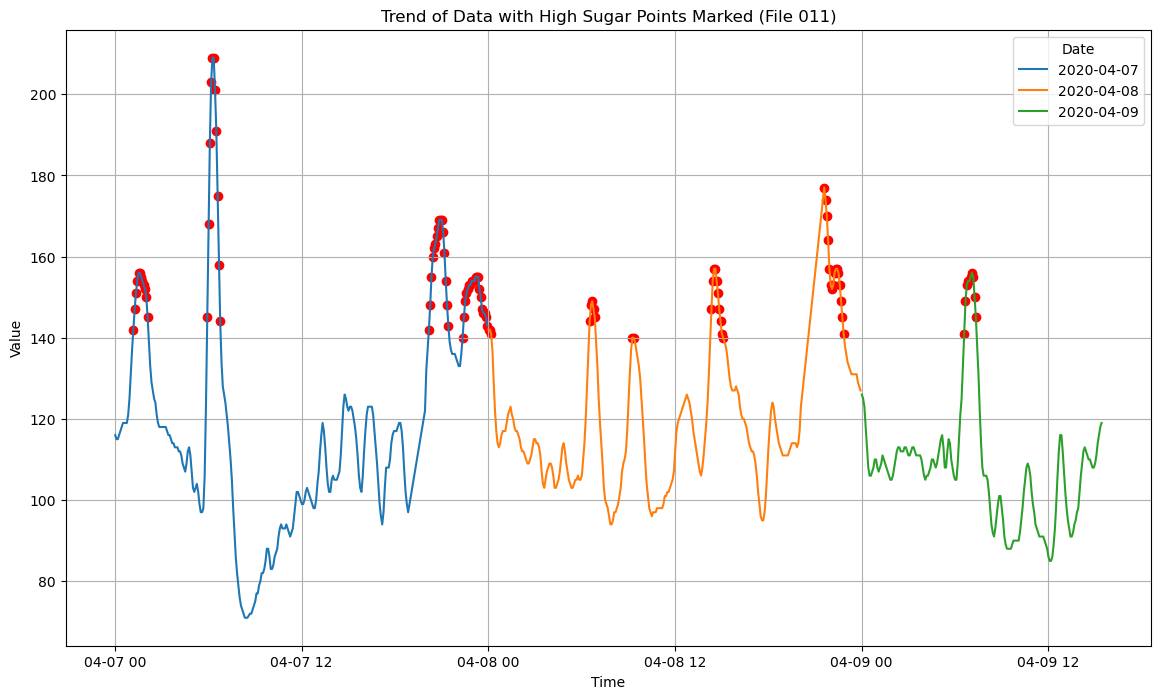

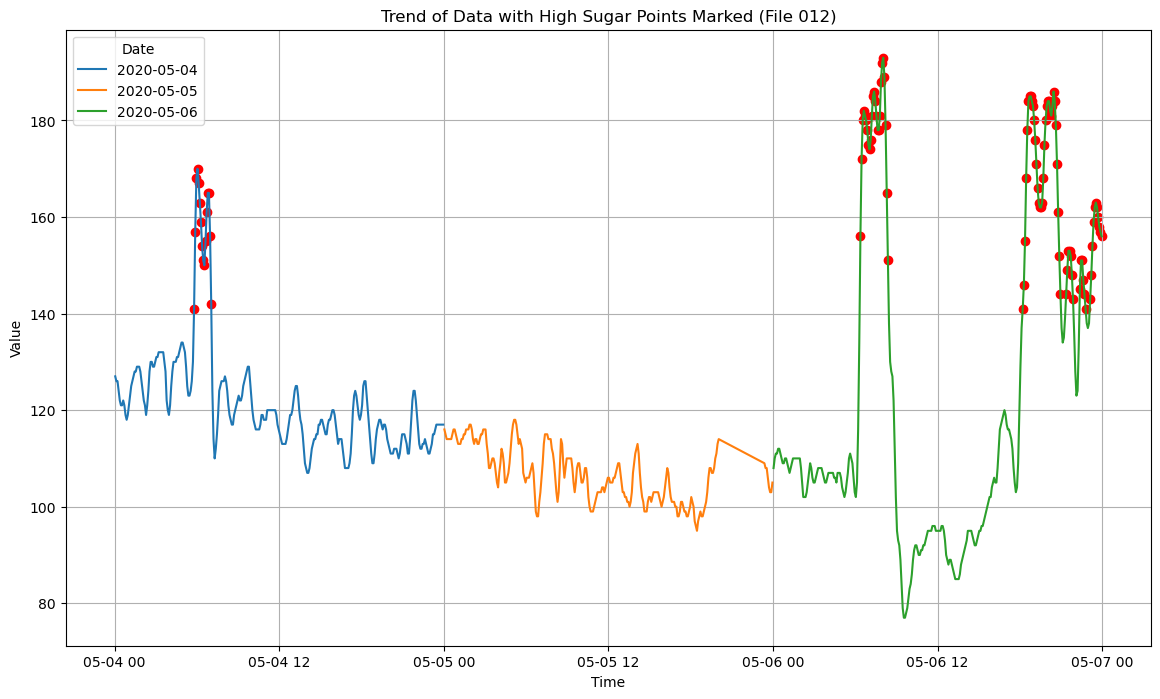

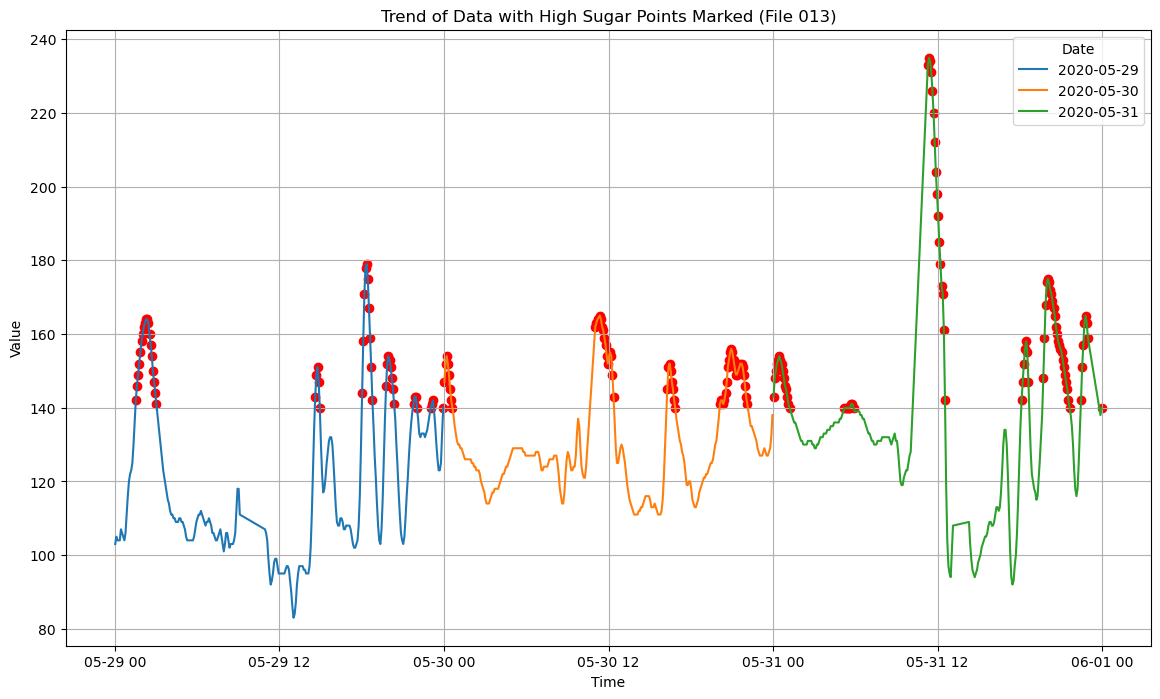

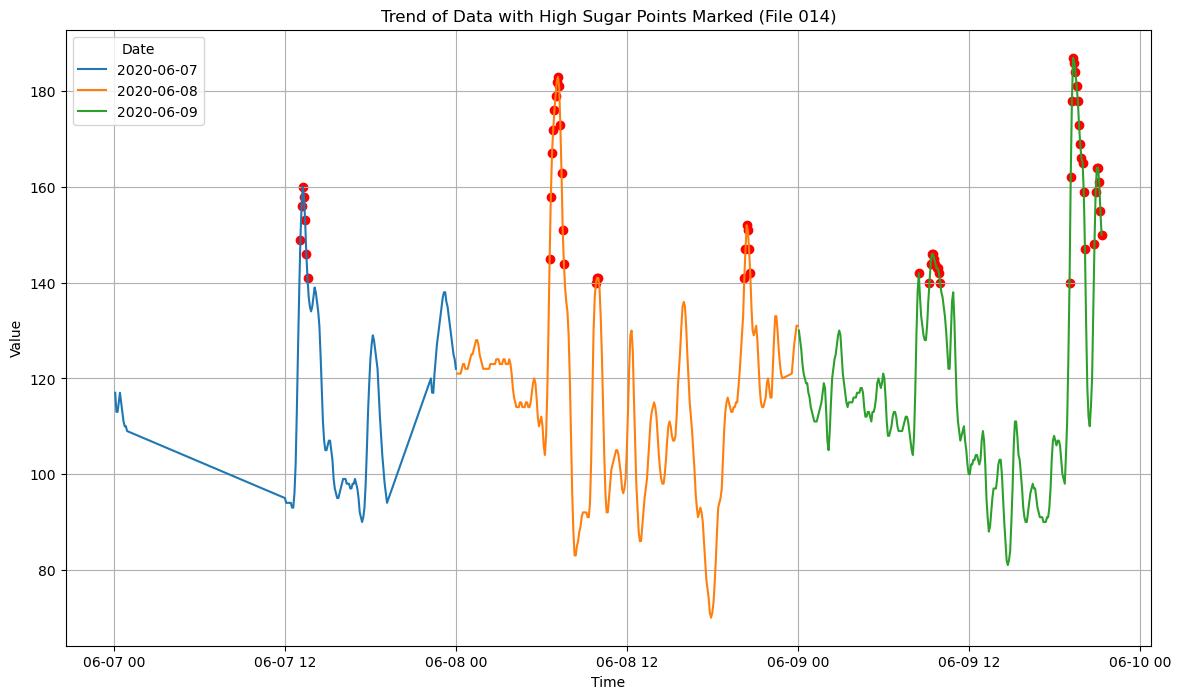

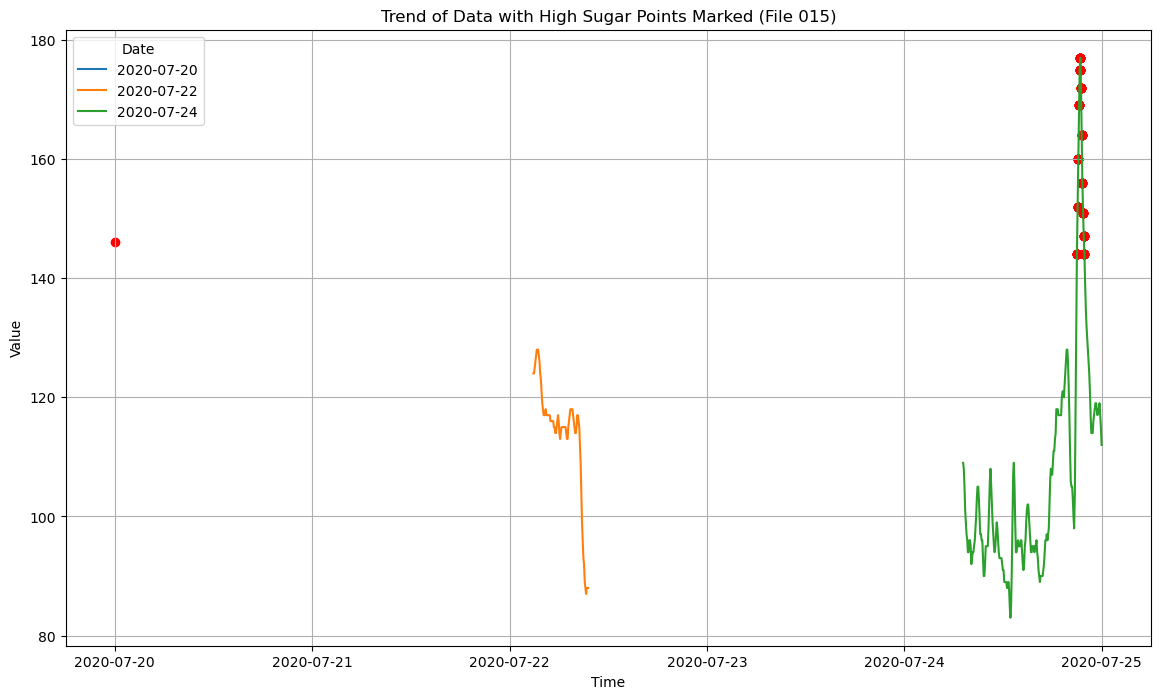

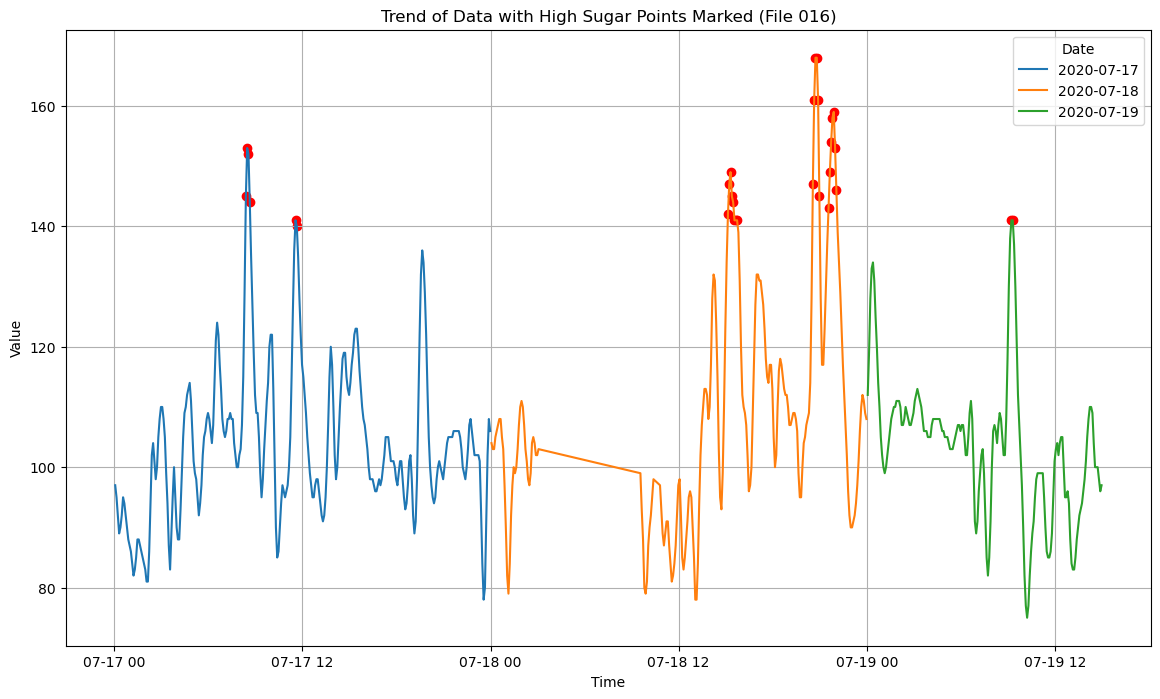

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义高糖阈值
gaotang = 140

# 获取所有文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 对每个文件编号进行处理
for file_num in file_nums:
    # 获取该用户的所有文件
    user_files = [f for f in os.listdir('processed_data') if f.startswith(f'processed_data_{file_num}') and f.endswith('.csv')]
    
    # 存储所有日期
    all_dates = []
    
    # 遍历这些文件
    for target_file in user_files:
        # 读取 CSV 文件
        data = pd.read_csv(os.path.join('processed_data', target_file))
        
        # 将第一列转换为 datetime 类型
        data['datetime'] = pd.to_datetime(data['datetime'])
        
        # 添加日期到列表
        all_dates.extend(data['datetime'].dt.date.unique())
    
    # 去除重复日期并排序
    all_dates = sorted(set(all_dates))
    
    # 取第二天、第三天、第四天的日期
    target_dates = all_dates[1:4]
    
    # 创建一个新的 figure 用于绘制所有目标日期的数据
    plt.figure(figsize=(14, 8))

    # 再次遍历这些文件并绘制图表
    for target_file in user_files:
        # 读取 CSV 文件
        data = pd.read_csv(os.path.join('processed_data', target_file))
        
        # 将第一列转换为 datetime 类型
        data['datetime'] = pd.to_datetime(data['datetime'])
        
        # 遍历目标日期并绘制图形
        for target_date in target_dates:
            # 过滤出目标日期的数据
            day_data = data[data['datetime'].dt.date == target_date]
            
            # 如果该天没有数据，则跳过
            if day_data.empty:
                continue
            
            # 绘制折线图
            plt.plot(day_data['datetime'], day_data.iloc[:, 1], label=target_date.strftime('%Y-%m-%d'))

            # 标出高糖值
            high_sugar_points = day_data[day_data.iloc[:, 1] >= gaotang]
            plt.scatter(high_sugar_points['datetime'], high_sugar_points.iloc[:, 1], color='red')

    plt.title(f'Trend of Data with High Sugar Points Marked (File {file_num})')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(title='Date')
    plt.grid(True)

    # 显示图形
    plt.show()

### 任务点1.5 时间属性离散化（阶段化）

为了预测每人在一天内的不同阶段是否会发生高糖，根据任务点1.4的观测结果，完成时间属性的离散化（阶段化）任务。例如，将一天划分为不同的阶段，分阶段预测是否发生高糖。具体的分段方法可自行决定，例如5分钟、1个小时、半天、上中下晚夜等。
并根据分段结果，构造每个的阶段的目标值（是否高糖），形成一列数据。

In [9]:
# 增加一列time_label_num和hour_label，将时间段分标签，并将时间段标签映射到数字
import pandas as pd

# 生成从 '002' 到 '016' 的文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 定义时间段和对应的标签
time_segments = [
    ('00:00:00', '03:59:59', '深夜'),
    ('04:00:00', '05:59:59', '凌晨'),
    ('06:00:00', '10:59:59', '上午'),
    ('11:00:00', '12:59:59', '中午'),
    ('13:00:00', '16:59:59', '下午'),
    ('17:00:00', '18:59:59', '傍晚'),
    ('19:00:00', '23:59:59', '晚上'),
]

# 创建一个映射字典，将时间段标签映射到数字
time_segment_mapping = {label: idx for idx, (_, _, label) in enumerate(time_segments)}

# 定义函数来分配时间段标签
def assign_time_segment(row, segments=time_segments):
    row_time = row['datetime'].time()
    for start, end, label in segments:
        if pd.to_datetime(start, format='%H:%M:%S').time() <= row_time <= pd.to_datetime(end, format='%H:%M:%S').time():
            return label
    return None

# 定义函数来转换标签为数字
def convert_label_to_number(row, mapping=time_segment_mapping):
    return mapping.get(row['time_label'], -1)

# 对每个文件应用时间标签
for file_num in file_nums:
    # 加载数据
    data = pd.read_csv(f'processed_data/processed_data_{file_num}.csv')
    
    # 将第一列转换为 datetime 类型
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # 应用函数并创建新列 'time_label'
    data['time_label'] = data.apply(assign_time_segment, axis=1)
    
    # 转换时间标签为数字编码
    data['time_label_num'] = data.apply(convert_label_to_number, axis=1)
    
    # 从 'datetime' 列中提取小时部分，并创建 'hour_label' 列
    data['hour_label'] = data['datetime'].dt.hour
    
    # 删除临时 'time_label' 列
    data.drop('time_label', axis=1, inplace=True)
    
    # 保存修改后的数据
    data.to_csv(f'processed_data/processed_data_{file_num}.csv', index=False)

    print(f'file{file_num} labeled with hour_label')

file002 labeled with hour_label
file003 labeled with hour_label
file004 labeled with hour_label
file005 labeled with hour_label
file006 labeled with hour_label
file007 labeled with hour_label
file008 labeled with hour_label
file009 labeled with hour_label
file010 labeled with hour_label
file011 labeled with hour_label
file012 labeled with hour_label
file013 labeled with hour_label
file014 labeled with hour_label
file015 labeled with hour_label
file016 labeled with hour_label


In [10]:
# 增加food_log.csv
import pandas as pd
from datetime import timedelta

# 生成从 '002' 到 '016' 的文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 定义一个函数来查找最近的时间点
def find_nearest_time(row, df, time_col='datetime', minutes=5):
    # 获取当前行的时间点
    current_time = row[time_col]
    # 计算时间窗口
    start_time = current_time - pd.Timedelta(minutes=minutes, unit='m')
    end_time = current_time + pd.Timedelta(minutes=minutes, unit='m')
    
    # 在 df 中查找落在时间窗口内的记录
    # 确保 start_time 和 end_time 与 df[time_col] 同a类型
    filtered_df = df.loc[(df[time_col] >= start_time) & (df[time_col] <= end_time)]
    if not filtered_df.empty:
        return filtered_df.iloc[0].name
    else:
        return None


for file_num in file_nums:
    # 加载数据
    data = pd.read_csv(f'processed_data/processed_data_{file_num}.csv')
    # print(data.head())
    # 将 datetime 列转换为 datetime 对象
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.columns = data.columns.str.strip()  
    # 去遍历food_log.csv 每个时间去找到离它五分钟内的时间，将calorie，total_carb，sugar,protein加到后面去，形成新的特征列
    food_log = pd.read_csv(f'food_log/Food_Log_{file_num}.csv')
    food_log.columns = food_log.columns.str.strip()
    # 我们将它们合并成一个 datetime 对象
    # print(f'{file_num}')
    food_log['datetime'] = pd.to_datetime(food_log['date'] + ' ' + food_log['time'])
     # 将 datetime 列转换为 datetime 对象
    food_log['datetime'] = pd.to_datetime(food_log['datetime'])
    # 应用函数，并创建一个新的索引列以追踪最近的时间点
    food_log['nearest_index'] = food_log.apply(find_nearest_time, axis=1, args=(data,))

    # 基于找到的索引，将营养信息添加到 data DataFrame 中
    data_with_nutrition = data.copy()
    data_with_nutrition['calorie'] = None
    data_with_nutrition['total_carb'] = None
    data_with_nutrition['sugar'] = None
    data_with_nutrition['protein'] = None

    # 遍历 food_log 中的每一行
    for index, row in food_log.iterrows():
        nearest_index = row['nearest_index']
        if nearest_index is not None:
            # 更新 data_with_nutrition 中的相应行
            data_with_nutrition.at[nearest_index, 'calorie'] = row['calorie']
            data_with_nutrition.at[nearest_index, 'total_carb'] = row['total_carb']
            data_with_nutrition.at[nearest_index, 'sugar'] = row['sugar']
            data_with_nutrition.at[nearest_index, 'protein'] = row['protein']

    # 将未匹配到的营养信息列填充为0.0（浮点数）
    data_with_nutrition[['calorie', 'total_carb', 'sugar', 'protein']] = data_with_nutrition[['calorie', 'total_carb', 'sugar', 'protein']].astype(float).fillna(0.0)

    # 保存处理后的数据
    data_with_nutrition.to_csv(f'processed_data/processed_data_{file_num}.csv', index=False)

    print(f'processed_data_{file_num}.csv saved')


processed_data_002.csv saved
processed_data_003.csv saved
processed_data_004.csv saved
processed_data_005.csv saved
processed_data_006.csv saved
processed_data_007.csv saved
processed_data_008.csv saved
processed_data_009.csv saved
processed_data_010.csv saved
processed_data_011.csv saved
processed_data_012.csv saved
processed_data_013.csv saved
processed_data_014.csv saved
processed_data_015.csv saved
processed_data_016.csv saved


最终得到处理过后的数据全部在processed_data中，格式如下：
datetime,Glucose Value (mg/dL), acc_x, acc_y, acc_z, bvp, eda, temp, ibi,time_label_num,hour_label
2020-02-21 11:08:36,186.0,0.3530385433908725,0.5987683562292753,0.9682968788400098,0.5670097914309226,0.0142822433851519,0.8179871520342614,0.2837837487233018,3,11